Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Procjena parametara

*Verzija: 1.0
Zadnji put ažurirano: 1. listopada 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **19. prosinca 2021. u 23:59h**

------------------------------

### Upute

Ova laboratorijska vježba sastoji se od tri zadatka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

### 1. Procjena maksimalne izglednosti

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### (a)

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [2]:
def L(mu, N, m):
    return mu**m*(1-mu)**(N-m)

#### (b)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

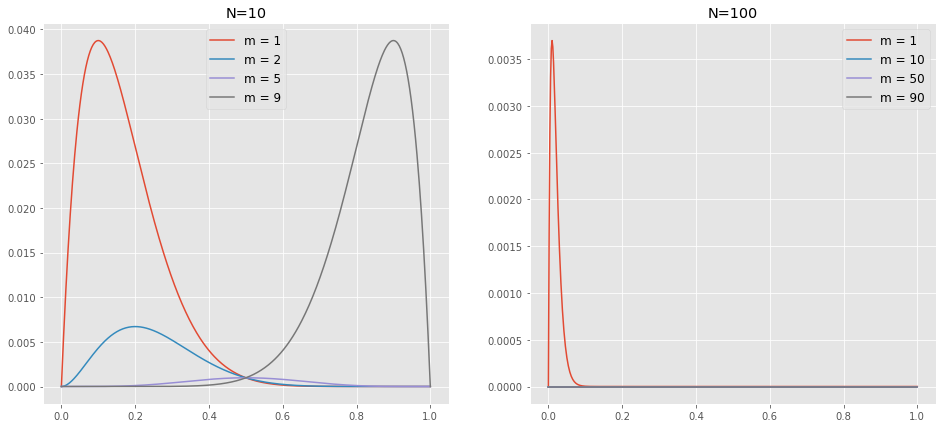

In [3]:
plt.style.use('ggplot')

N1 = 10
N2 = 100
m_vals_1 = [1, 2, 5, 9]
m_vals_2 = [1, 10, 50, 90]
mu = np.linspace(0, 1, 500)

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.title(f"N={N1}")
for m in m_vals_1:
    plt.plot(mu, L(mu, N1, m), label=f"m = {m}")
plt.legend(loc="best", fontsize="large")

plt.subplot(1, 2, 2)
plt.title(f"N={N2}")
for m in m_vals_2:
    plt.plot(mu, L(mu, N2, m), label=f"m = {m}")
plt.legend(loc="best", fontsize="large")
    
plt.show()

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

#### (c)

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

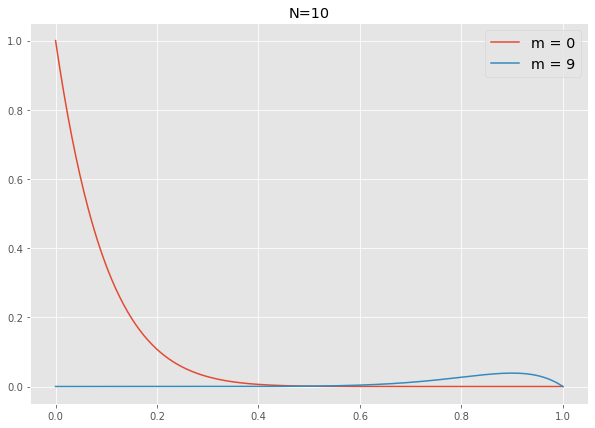

In [4]:
N = 10
m_vals = [0, 9]

plt.figure(figsize=(10, 7))
plt.title(f"N={N}")
for m in m_vals:
    plt.plot(mu, L(mu, N, m), label=f"m = {m}")
plt.legend(loc="best", fontsize="x-large")
plt.show()

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

### 2. Procjena maksimalne aposteriorne vjerojatnosti

#### (a)

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

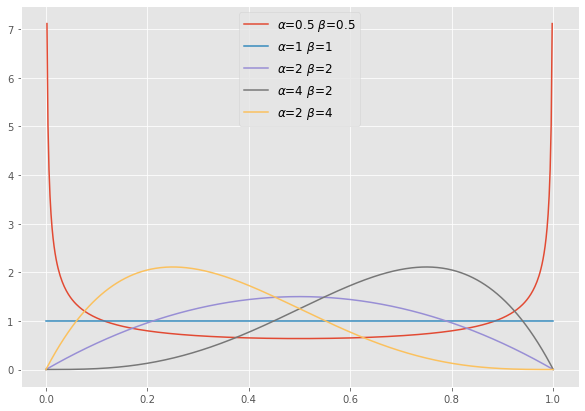

In [5]:
from scipy.stats import beta

alpha_vals = [0.5, 1, 2, 4, 2]
beta_vals = [0.5, 1, 2, 2, 4]

plt.figure(figsize=(10, 7))
for a, b in zip(alpha_vals, beta_vals):
    plt.plot(mu, beta.pdf(mu, a, b), label=f'$\\alpha$={a} $\\beta$={b}')
plt.legend(loc="best", fontsize="large")
plt.show()

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

#### (b)

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za $N=10$ i $m=9$ i nekolicinu kombinacija parametara $\alpha$ i $\beta$. 

In [6]:
def P(mi, N, m, a, b):
    return L(mi, N, m) * beta.pdf(mi, a, b)

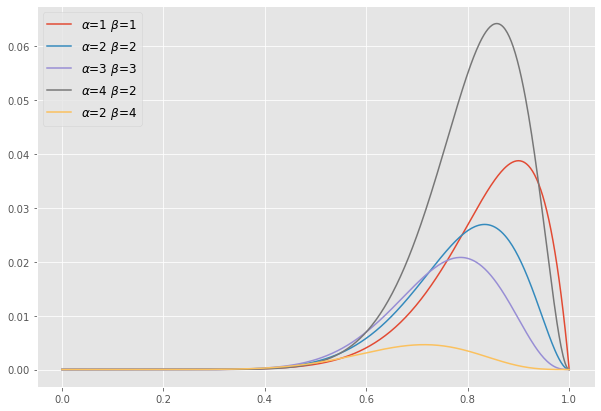

In [7]:
N = 10
m = 9
alpha_vals = [1, 2, 3, 4, 2]
beta_vals = [1, 2, 3, 2, 4]

plt.figure(figsize=(10, 7))
for a, b in zip(alpha_vals, beta_vals):
    plt.plot(mu, P(mu, N, m, a, b), label=f'$\\alpha$={a} $\\beta$={b}')
plt.legend(loc="best", fontsize="large")
plt.show()    

**Q**: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

#### (c)

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

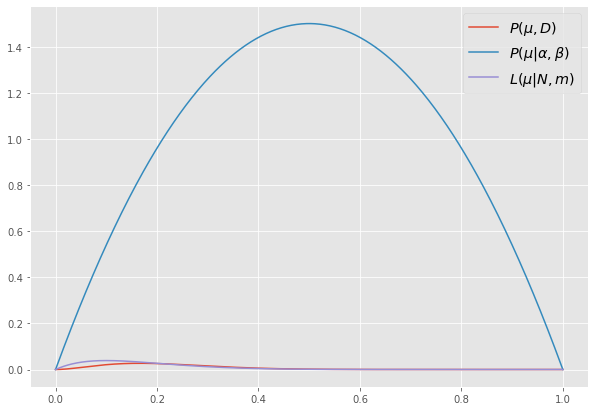

In [8]:
N = 10
m = 1
a = b = 2

plt.figure(figsize=(10, 7))
plt.plot(mu, P(mu, N, m, a, b), label=f'$P(\mu, D)$')
plt.plot(mu, beta.pdf(mu, a, b), label=f'$P(\mu|\\alpha, \\beta)$')
plt.plot(mu, L(mu, N, m), label=f'$L(\mu|N, m)$')
plt.legend(loc="best", fontsize="x-large")
plt.show()

### 3. Analiza skupa podataka *Iris*

#### (a)

Učitajte skup podataka *Iris* korištenjem funkcije [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (**u nastavku radite isključivo s primjerima iz te jedne klase**). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

**NB:** Mogla bi Vam dobro dući funkcija [`itertools.combinations`](https://docs.python.org/2/library/itertools.html#itertools.combinations).

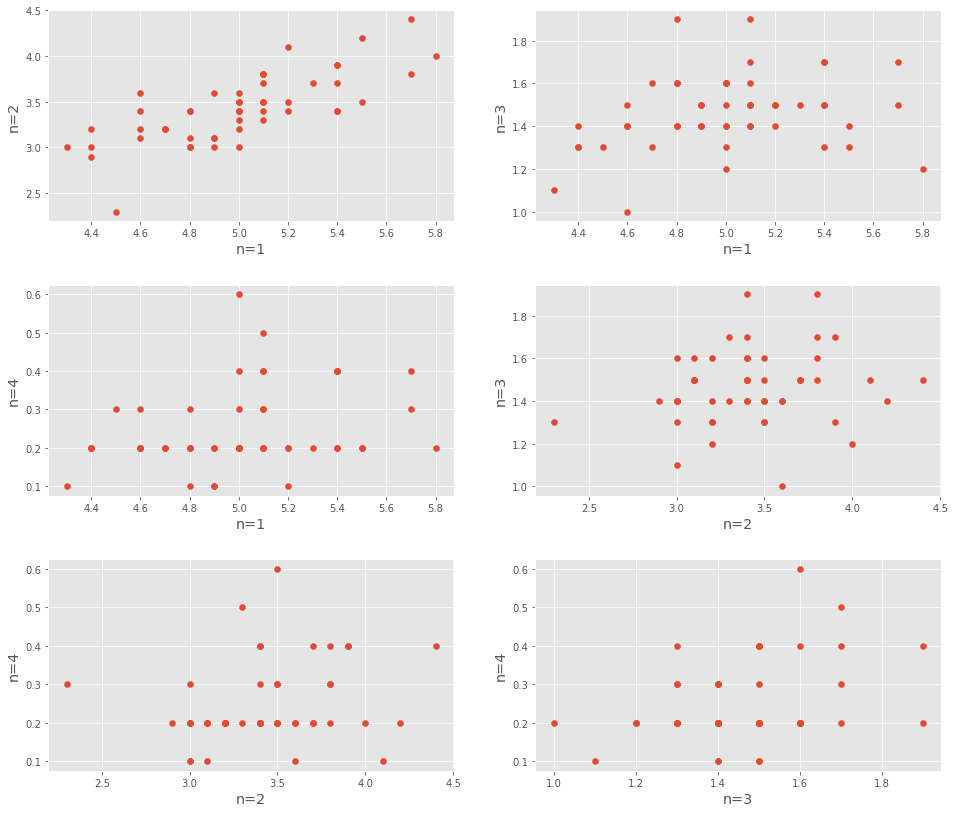

In [9]:
from sklearn.datasets import load_iris
import itertools as it

pairs = it.combinations(range(0, 4), 2)

dataset = load_iris()
# primjeri iz prve klase
K1 = dataset.data[dataset.target == 0]

plt.figure(figsize(16, 14))
plt.subplots_adjust(hspace=0.3)
ct = 0
for x, y in pairs:
    ct += 1
    plt.subplot(3, 2, ct)
    plt.scatter(K1[:,x], K1[:,y])
    plt.xlabel(f"n={x+1}", fontsize="x-large")
    plt.ylabel(f"n={y+1}", fontsize="x-large")

#### (b)

Pogledajte opis modula [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

In [10]:
from scipy.stats import norm

def L_gauss(x, mi, sigma):
    res = 1.0
    for i in x:
        res *= norm.pdf(i, loc=mi, scale=sqrt(sigma))
    return log(res)

#### (c)
Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

In [11]:
n = 4
for i in range(n):
    x = K1[:,i]
    mi = sum(x)/len(x)
    sigma = sum((x - mi)**2)/len(x)
    print(f"n={i}  |  mi={mi:0.5f}  |  sigma={sigma:.5f}  |  log-izglednost={L_gauss(x, mi, sigma):10.5f}")

n=0  |  mi=5.00600  |  sigma=0.12176  |  log-izglednost= -18.30516
n=1  |  mi=3.42800  |  sigma=0.14082  |  log-izglednost= -21.93940
n=2  |  mi=1.46200  |  sigma=0.02956  |  log-izglednost=  17.08979
n=3  |  mi=0.24600  |  sigma=0.01088  |  log-izglednost=  42.06461


#### (d)

Proučite funkciju [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [12]:
from scipy.stats import pearsonr

pairs = it.combinations(range(0, 4), 2)
for x, y in pairs:
    print(f"Pearsonov koeficijent korelacije između značajki {x+1} i {y+1}: {pearsonr(K1[:,x], K1[:,y])[0]:.6f}")

Pearsonov koeficijent korelacije između značajki 1 i 2: 0.742547
Pearsonov koeficijent korelacije između značajki 1 i 3: 0.267176
Pearsonov koeficijent korelacije između značajki 1 i 4: 0.278098
Pearsonov koeficijent korelacije između značajki 2 i 3: 0.177700
Pearsonov koeficijent korelacije između značajki 2 i 4: 0.232752
Pearsonov koeficijent korelacije između značajki 3 i 4: 0.331630


#### (e)

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika (srednja apsolutna i kvadratna) smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [13]:
N = len(K1)
N_vals = [N//4, N//2, N]

for val in N_vals:
    biased = cov(K1[:val,:], rowvar=False, bias=True)
    unbiased = cov(K1[:val,:], rowvar=False, bias=False)
    
    diff = biased - unbiased
    print(f"N={val}  |  srednja apsolutna razlika={mean(abs(diff)):.6f}  |  srednja kvadratna razlika={mean(pow(diff, 2)):.6f}")

N=12  |  srednja apsolutna razlika=0.002399  |  srednja kvadratna razlika=0.000013
N=25  |  srednja apsolutna razlika=0.001849  |  srednja kvadratna razlika=0.000008
N=50  |  srednja apsolutna razlika=0.000769  |  srednja kvadratna razlika=0.000001
